In [51]:
#As usual we'll start by importing some of the libs we'll need.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
#this should be all we're gonna need

In [9]:
#let's now import our dataset:
data = pd.read_csv("titanic.csv")

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#since we already preprocessed this file in the 3rd checkpoint, i'll just copy and paste the code from there.
#i'll include the file from the 3rd checkpoint if you wanna check it.

In [12]:
#let's now start the preprocessing phase.
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#the "cabin" column has a lot of missing data.
#we're going to drop this column since it's not important
data.drop('Cabin', inplace=True, axis=1)

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [16]:
#the "age" column also has a lot of missing data but we can't drop it since it's important and cannot be treated.
#so we're going to fill in the missing data with the mean/average.
data["Age"].fillna(data["Age"].mean(), inplace=True)

In [17]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [19]:
#our data is now much cleaner and we only have two rows with missing data so we're simply going to delete them.
data.dropna(axis=0, how='any', thresh=None, inplace=True)

In [20]:
data.isnull().sum().sum()
#we can now be sure that our data is clean and is ready to be treated.
#the preprocessing phase is over.

0

In [21]:
#let's first convert sex from male and female to 1 and 0:
data["Sex"]=data["Sex"].map({"male": 1, "female": 0})

In [22]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [31]:
#as we established in the 3rd checkpoint, the most important features are age and sex.
#let's now make our model.

In [48]:
x = data[['Age', 'Sex']]
y = data['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=40)

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
prediction = logreg.predict(x_test)

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       138
           1       0.72      0.71      0.71        85

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



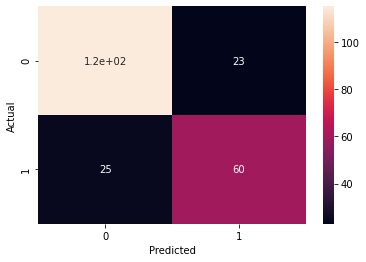

In [53]:
#our model is now trained, instead of showing scoring our model, we'll use a confusion matrix to check it.
confusion_matrix = pd.crosstab(y_test, prediction, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(classification_report(y_test,prediction))

In [54]:
#without even looking at the report we can already see that the amount of true positives and negatives is much larger than false ones.
#with that and with the report we can say that our model did pretty good.
#let's now have a look at ROC/AUC.

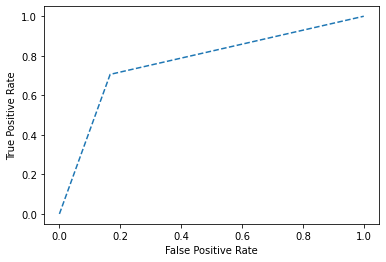

AUC Score = 0.769607843137255


In [63]:
#I did my research and from what I can understand, ROC stands for receiver operating characteristic curve and AUC stands for
#the area under that curve.
#The ROC curve plots the True Positive Rate which is also known as recall, against the False Positive Rate.
#The AUC is a float that ranges from 0 to 1 and scores the performance of the model, the higher the model.
#I found out that an AUC of 1.0 means the model got all of the answers correct, and and AUC of 0.0 means the model got all of 
#the answers wrong, so it might be a percentage.
#let's do our research on ROC/AUC code and use it:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, prediction)
x_roc, y_roc, _ = roc_curve(y_test, prediction)
plt.plot(x_roc, y_roc, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("AUC Score =", auc_score)

In [ ]:
#as we can see the AUC is pretty high which means our model did good.